In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('../styles_and_utils/graphstyle.mplstyle')

import sys
sys.path.insert(1, '../')
from styles_and_utils import *

In [2]:
# pandas
import pandas as pd
def df2np(df, model,):
    df = df.loc[df['Model'] == model].iloc[0,1:]
    x = df.to_numpy().astype(float).T
    return x

# Load Knee results
df = pd.read_excel('throughput.xlsx')

unt_008M = df2np(df, 'U-Net-8M')
unt_031M = df2np(df, 'U-Net-31M')
unt_124M = df2np(df, 'U-Net-124M')

vit_008M = df2np(df, 'ViT-8M/10')
vit_032M = df2np(df, 'ViT-32M/10')
vit_060M = df2np(df, 'ViT-60M/10')


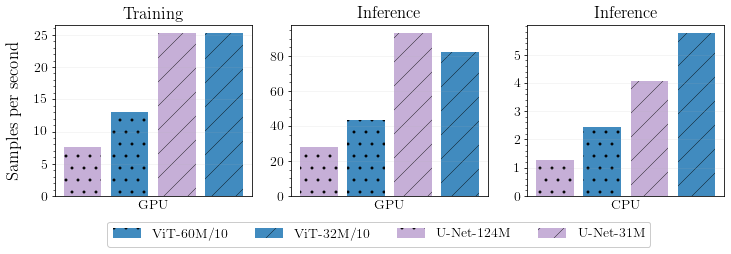

In [10]:
w, h = plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(1, 3, figsize=(2*w, 0.7*h))

""" Model styles """
vits = ViT('s', useline=False)
vitm = ViT('m', useline=False)
vitl = ViT('l', useline=False)

unts = Unet('s', useline=False)
untm = Unet('m', useline=False)
untl = Unet('l', useline=False)

alpha = 0.85
""" Training """
ax = axes[0]
# ax.bar('ViT-\n8M/10', vit_008M[0], color = vits.color, hatch = vits.hatch)
# ax.bar('U-Net-\n8M',  unt_008M[0], color = unts.color, hatch = unts.hatch)
ax.bar('U-Net-\n124M',unt_124M[0], color = untl.color, alpha=alpha, hatch = untl.hatch)
ax.bar('ViT-\n60M/10',vit_060M[0], color = vitl.color, alpha=alpha, hatch = vitl.hatch)
ax.bar('U-Net-\n31M', unt_031M[0], color = untm.color, alpha=alpha, hatch = untm.hatch)
ax.bar('ViT-\n32M/10',vit_032M[0], color = vitm.color, alpha=alpha, hatch = vitm.hatch) 
# ax.get_xaxis().set_visible(False)
ax.set_title('Training')
ax.set_xticks([])
ax.set_xlabel('GPU')
# ax.set_yticks([0, 1,  2, 3])

""" Test """
ax = axes[1]
# ax.bar('ViT-\n8M/10', vit_008M[1], color = vits.color, hatch = vits.hatch)
# ax.bar('U-Net-\n8M',  unt_008M[1], color = unts.color, hatch = unts.hatch)
ax.bar('U-Net-\n124M',unt_124M[1], color = untl.color, alpha=alpha, hatch = untl.hatch)
ax.bar('ViT-\n60M/10',vit_060M[1], color = vitl.color, alpha=alpha, hatch = vitl.hatch)
ax.bar('U-Net-\n31M', unt_031M[1], color = untm.color, alpha=alpha, hatch = untm.hatch)
ax.bar('ViT-\n32M/10',vit_032M[1], color = vitm.color, alpha=alpha, hatch = vitm.hatch)
ax.set_xticks([])
ax.set_xlabel('GPU')
ax.set_title('Inference')
# ax.set_xlabel('(CPU)')
# ax.set_yticks([0, 1,  2, 3])

""" Test CPU """
ax = axes[2]
# ax.bar('ViT-\n8M/10', vit_008M[2], color = vits.color, hatch = vits.hatch, label = vits.label)
# ax.bar('U-Net-\n8M',  unt_008M[2], color = unts.color, hatch = unts.hatch, label = unts.label)
ax.bar(2, vit_060M[2], color = vitl.color, hatch = vitl.hatch, alpha=alpha, label = vitl.label)
ax.bar(4, vit_032M[2], color = vitm.color, hatch = vitm.hatch, alpha=alpha, label = vitm.label)
ax.bar(1, unt_124M[2], color = untl.color, hatch = untl.hatch, alpha=alpha, label = untl.label)
ax.bar(3, unt_031M[2], color = untm.color, hatch = untm.hatch, alpha=alpha, label = untm.label)
ax.set_xticks([])
ax.set_xlabel('CPU')
ax.set_title('Inference')
ax.set_yticks([0, 1, 2, 3, 4, 5])
# ax.set_title('CPU')

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels,  ncol=4, loc='lower center',  bbox_to_anchor = (0.,-0.13,1,1))

# Labels
# fig.supxlabel('Memory in GiB', y=0.0, x=0.37)
fig.supylabel('Samples per second', x=0.07, y=0.5)

## Save
# fig.tight_layout()
fig.savefig('speed_memory.pdf', format="pdf", bbox_inches = 'tight')